<a href="https://colab.research.google.com/github/Risuo/Euler/blob/master/Final_Project_Average_Google_Places_Review_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, you will load a **real-world dataset of consumer activities** (e.g. product reviews) from the web, compute basic statistics about the data, and perform some visualizations of the data.

Deliverables: A Jupyter notebook (PDF format) to extract and visualize basic dataset statistics (JSON/CSV --> visualization)

To save your Jupyter notebook as a PDF, File -> Print will open a static view of the notebook in your browser. You may then use your computer's Print or Save functionality to save the page as a PDF.

In [0]:
#gdrive/My Drive/google_review_ratings.csv

The dataset can be found at: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings#)

and was compiled by Shini Renjith. 

The dataset is a collection of 5456 users, and the average star rating, from 1-5, that user gave to a sub-collection of different categories. 

Each entry in the dataset consists of a unique user (from 1-5456), and their average rating over 24 different categories. 

The dataset contains 'zero star' entries, which are not possible through Google, and are therefore actually 'not-reviewed' data points. As a result, the averages can be below 1-star (the minimum rating) for any category, since it is including 'not-reviewed' points in the by-user averages within those categories. 

Essentially, the dataset is marginally flawed in that it appears to have sampled a base number of locations, and then simply taken the average of any user of THOSE locations, and when the user did not review a particular location, it entered as a 'zero-star' rating, which would then lead to the per-user's average being lower than 1.0, which again is the minimum that the user could have actually rated an establishment. 


In [0]:
import csv
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import PercentFormatter
import pandas as pd
from itertools import combinations as combinations


def create_full() creates two outputs. 
a) The first output is an organized dictionary with intelligible labels on each dictionary item. 
b) The second output is also an organized dictionary, just with only users who have non-zero averages along all categories.

The dataset required a manual creation of a header array with which to zip the actual column data. It also required the ignoring of the first line, as it was the generic 'category 1, category 2' etc content. 

Additionally, there were a handful of typographical entries (non-int/float data, for example. '.5' ) which needed to be scrubbed. 

After that, I created a 'average of all averages' and added it to the array. 

In [0]:
def create_full():
  dataset = []
  f = open("/gdrive/My Drive/google_review_ratings.csv")
  next(f)
  all_lines = csv.reader(f, delimiter = ',')
  
  header = ['user_id',  'avg_church', 'avg_resort', 'avg_beach', 'avg_park', 
            'avg_theatre', 'avg_museum', 'avg_mall', 'avg_zoo', 'avg_restaurant',
            'avg_bars', 'avg_local_services', 'avg_burger_pizza_shops', 'avg_lodgings',
            'avg_juice_bars', 'avg_art_galleries', 'avg_dance_clubs', 'avg_pools', 
            'avg_gyms', 'avg_bakeries', 'avg_spas', 'avg_cafes', 'avg_view_points', 
            'avg_monuments', 'avg_gardens'] # the header line isn't usable from this dataset, so we have to translate it ourselves
  
  for line in all_lines:
    d = dict(zip(header, line))
    for field in header:
      if field != 'user_id':
        try:
          d[field] = float(d[field])
        except:
          ('error standard',d['user_id'])
    dataset.append(d)
  dataset_stripped = []
  for a in dataset:
    to_add = True
    for b in header:
      if b != 'user_id':
        try:
          a[b] = float(a[b])
          if float(a[b]) == 0:
            to_add = False
        except:
          ('error stripped',d['user_id'])
    if to_add:
      dataset_stripped.append(a)

  
  #dataset.pop(0) #the first line of the dataset is 'userid, category1, category2, so that needs to be stripped'
  return(dataset, dataset_stripped)
  
  

In [0]:
dataset, dataset_stripped = create_full()

In [93]:
len(dataset_stripped), len(dataset)

(3725, 5456)

In [94]:
dataset_stripped[0]

{'avg_art_galleries': 1.33,
 'avg_bakeries': 0.53,
 'avg_bars': 2.83,
 'avg_beach': 0.82,
 'avg_burger_pizza_shops': 1.46,
 'avg_cafes': 0.75,
 'avg_church': 0.83,
 'avg_dance_clubs': 1.35,
 'avg_gardens': 0.73,
 'avg_gyms': 0.58,
 'avg_juice_bars': 1.31,
 'avg_local_services': 2.06,
 'avg_lodgings': 1.35,
 'avg_mall': 2.93,
 'avg_monuments': 0.72,
 'avg_museum': 5.0,
 'avg_park': 0.85,
 'avg_pools': 0.55,
 'avg_resort': 0.78,
 'avg_restaurant': 2.82,
 'avg_spas': 0.5,
 'avg_theatre': 3.85,
 'avg_view_points': 0.73,
 'avg_zoo': 2.92,
 'user_id': 'User 69'}

In [0]:
def getUserAvg(dataset):
  dataset = dataset
  table = []
  avg_table = []
  for d in dataset:
    for k,v in d.items():
      if type(v) != str:
        if v > 0:
          table.append(v)
    avg = np.average(np.array(table))
    d['user_Avg'] = avg
    avg_table.append(avg)
  return dataset, avg_table

Here I decided to find the for-each-user average of all of their ratings. We use this below in a histogram to view how the users averaged. 

In [0]:
dataset, userAverages = getUserAvg(dataset)
dataset_stripped, userAverages_stripped = getUserAvg(dataset_stripped)

Below is the code showing four progressive histograms, each one taking a more granular bin approach to the userAverages data.  This shows an interesting aspect of the dataset, namely that the vast majority of averaged-reviews fall, perhaps unsurprisingly, very closely to the average of the high (5 star) and the low (0 star, or missing) rating. (5-0 = 6 possible ratings. 5 is the max, so 5/6 = the weighting for each score. If it were perfectly distributed, each score, 0-5, would have 5/6ths of the votes.  To find the hypothetical average, it would be 3*(5/6), the middle, which is 2.142.  As shown in the histogram below, that is very close to where the vast majority of the ratings actually fall!)

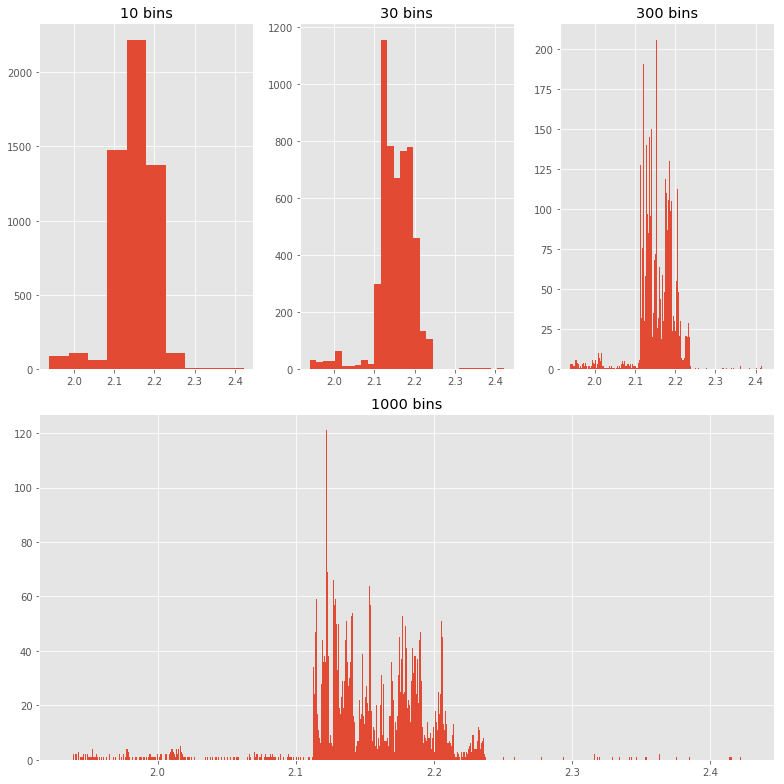

In [97]:
userAverages = np.array(userAverages)
userAverages.sort()

#plt.rcParams['figure.figsize'] = [10, 4]

matplotlib.style.use('ggplot')

n_binsA = 10
n_binsB = 30
n_binsC = 300
n_binsD = 1000

fig = plt.figure(figsize=(11,11))
gs = gridspec.GridSpec(nrows=2, ncols=3)

ax0 = fig.add_subplot(gs[0,0])
ax0.hist(userAverages, bins=n_binsA)
ax0.set_title('10 bins')

ax1 = fig.add_subplot(gs[0,1])
ax1.hist(userAverages, bins=n_binsB)
ax1.set_title('30 bins')

ax2 = fig.add_subplot(gs[0,2])
ax2.hist(userAverages, bins=n_binsC)
ax2.set_title('300 bins')

ax3 = fig.add_subplot(gs[1:, :])
ax3.hist(userAverages, bins=n_binsD)
ax3.set_title('1000 bins')

plt.tight_layout()
plt.show()

In [0]:
def get_Avg_and_Count_non_Zeros(dataset, field):
  field = str(field)
  dataset = dataset
  subArray = np.array([d[field] for d in dataset if d[field] > 0.0])
  avg = np.average(subArray)
  count = len(subArray)
  return avg, count, subArray, field

Now we're combining the average data, calculated internally, with the overall dataset, to create a more specific curated dataset. 
In this case, we're removing all zero-star users and organizing by category. 

In [0]:
def get_Avg_and_Count_non_Zeros_Fives(dataset, field):
  field = str(field)
  dataset = dataset
  subArray = np.array([d[field] for d in dataset if d[field] > 0.0])
  subArray = np.array([a for a in subArray if a < 5])
  count = len(subArray)
  avg = np.average(subArray)
  return avg, count, subArray, field

Similarly to the above, this time we're also removing the 5-star ratings. We'll use this one in our by-category large histogram collection below. 

In [0]:

artAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_art_galleries')
bakeryAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_bakeries')
barAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_bars')
beachAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_beach')
cafeAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_cafes')
churchAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_church')
danceAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_dance_clubs')
gymAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_gyms')
juiceAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_juice_bars')
lodgingAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_lodgings')
mallAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_mall')
monumentsAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_monuments')
museumAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_museum')
parkAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_park')
poolAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_pools')
resortAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_resort')
restaurantAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_restaurant')
spasAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_spas')
theatreAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_theatre')
viewPointAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_view_points')
zooAvgCount_no_5_stripped = get_Avg_and_Count_non_Zeros_Fives(dataset_stripped, 'avg_zoo')


In [101]:
zooAvgCount_no_5_stripped

(2.213665236051502,
 3495,
 array([2.92, 2.91, 2.91, ..., 1.05, 1.03, 1.02]),
 'avg_zoo')

In [0]:
# Create an array, ignoring the zeros, of:
# 0: the average vote of ALL users ALL entries in this field type
# 1: the total number of users who are represented in this field type
# 2: a numpy array of the actual average votes of each user, stripping the identification of per-user from the array
# 3: the name of the field type
# Example: ((2.45951677852349,  3725,  array([0.82, 0.83, 0.84, ..., 4.03, 4.05, 5.  ]),  'avg_beach'),


artAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_art_galleries')
bakeryAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_bakeries')
barAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_bars')
beachAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_beach')
cafeAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_cafes')
churchAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_church')
danceAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_dance_clubs')
gymAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_gyms')
juiceAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_juice_bars')
lodgingAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_lodgings')
mallAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_mall')
monumentsAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_monuments')
museumAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_museum')
parkAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_park')
poolAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_pools')
resortAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_resort')
restaurantAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_restaurant')
spasAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_spas')
theatreAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_theatre')
viewPointAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_view_points')
zooAvgCount = get_Avg_and_Count_non_Zeros(dataset, 'avg_zoo')

In [0]:
# Create an array, ignoring the zeros, of:
# 0: the average vote of ALL users ALL entries in this field type
# 1: the total number of users who are represented in this field type
# 2: a numpy array of the actual average votes of each user, stripping the identification of per-user from the array
# 3: the name of the field type
# Example: ((2.45951677852349,  3725,  array([0.82, 0.83, 0.84, ..., 4.03, 4.05, 5.  ]),  'avg_beach'),

# This is exactly the same as the field above, except that for THIS collection, the per-user identification is maintained, as every user in this group has performed a review of EVERY field type
# which allows for a per-index (i.e., user) comparison between field types


artAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_art_galleries')
bakeryAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_bakeries')
barAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_bars')
beachAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_beach')
cafeAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_cafes')
churchAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_church')
danceAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_dance_clubs')
gymAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_gyms')
juiceAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_juice_bars')
lodgingAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_lodgings')
mallAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_mall')
monumentsAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_monuments')
museumAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_museum')
parkAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_park')
poolAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_pools')
resortAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_resort')
restaurantAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_restaurant')
spasAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_spas')
theatreAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_theatre')
viewPointAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_view_points')
zooAvgCount_stripped = get_Avg_and_Count_non_Zeros(dataset_stripped, 'avg_zoo')

In [0]:
total_Averages = [artAvgCount, bakeryAvgCount, barAvgCount, beachAvgCount, cafeAvgCount, churchAvgCount,
                 danceAvgCount, gymAvgCount, juiceAvgCount, lodgingAvgCount, mallAvgCount,
                 monumentsAvgCount, museumAvgCount, parkAvgCount, poolAvgCount, resortAvgCount,
                 restaurantAvgCount, spasAvgCount, theatreAvgCount, viewPointAvgCount, zooAvgCount]

eateries = [bakeryAvgCount, cafeAvgCount, juiceAvgCount, restaurantAvgCount]
events   = [artAvgCount, beachAvgCount, danceAvgCount, monumentsAvgCount, museumAvgCount, 
            parkAvgCount, poolAvgCount, resortAvgCount, spasAvgCount, theatreAvgCount, 
            viewPointAvgCount, zooAvgCount]
outside  = [beachAvgCount, monumentsAvgCount, parkAvgCount, poolAvgCount, resortAvgCount,
           viewPointAvgCount, zooAvgCount]
inside   = [artAvgCount, churchAvgCount, danceAvgCount, gymAvgCount, lodgingAvgCount,
           mallAvgCount, museumAvgCount, spasAvgCount, theatreAvgCount]
destination = [lodgingAvgCount, resortAvgCount]
educational = [artAvgCount, monumentsAvgCount, museumAvgCount, parkAvgCount, theatreAvgCount,
               viewPointAvgCount, zooAvgCount]
recreational = [beachAvgCount, danceAvgCount, mallAvgCount, parkAvgCount, poolAvgCount, 
               resortAvgCount, spasAvgCount, theatreAvgCount, viewPointAvgCount, zooAvgCount]


In [0]:

total_Averages_no_5_stripped = [artAvgCount_no_5_stripped, bakeryAvgCount_no_5_stripped, barAvgCount_no_5_stripped, beachAvgCount_no_5_stripped, cafeAvgCount_no_5_stripped, churchAvgCount_no_5_stripped,
                 danceAvgCount_no_5_stripped, gymAvgCount_no_5_stripped, juiceAvgCount_no_5_stripped, lodgingAvgCount_no_5_stripped, mallAvgCount_no_5_stripped,
                 monumentsAvgCount_no_5_stripped, museumAvgCount_no_5_stripped, parkAvgCount_no_5_stripped, poolAvgCount_no_5_stripped, resortAvgCount_no_5_stripped,
                 restaurantAvgCount_no_5_stripped, spasAvgCount_no_5_stripped, theatreAvgCount_no_5_stripped, viewPointAvgCount_no_5_stripped, zooAvgCount_no_5_stripped]

eateries_no_5_stripped = [bakeryAvgCount_no_5_stripped, cafeAvgCount_no_5_stripped, juiceAvgCount_no_5_stripped, restaurantAvgCount_no_5_stripped]
events_no_5_stripped   = [artAvgCount_no_5_stripped, beachAvgCount_no_5_stripped, danceAvgCount_no_5_stripped, monumentsAvgCount_no_5_stripped, museumAvgCount_no_5_stripped, 
            parkAvgCount_no_5_stripped, poolAvgCount_no_5_stripped, resortAvgCount_no_5_stripped, spasAvgCount_no_5_stripped, theatreAvgCount_no_5_stripped, 
            viewPointAvgCount_no_5_stripped, zooAvgCount_no_5_stripped]
outside_no_5_stripped  = [beachAvgCount_no_5_stripped, monumentsAvgCount_no_5_stripped, parkAvgCount_no_5_stripped, poolAvgCount_no_5_stripped, resortAvgCount_no_5_stripped,
           viewPointAvgCount_no_5_stripped, zooAvgCount_no_5_stripped]
inside_no_5_stripped   = [artAvgCount_no_5_stripped, churchAvgCount_no_5_stripped, danceAvgCount_no_5_stripped, gymAvgCount_no_5_stripped, lodgingAvgCount_no_5_stripped,
           mallAvgCount_no_5_stripped, museumAvgCount_no_5_stripped, spasAvgCount_no_5_stripped, theatreAvgCount_no_5_stripped]
destination_no_5_stripped = [lodgingAvgCount_no_5_stripped, resortAvgCount_no_5_stripped]
educational_no_5_stripped = [artAvgCount_no_5_stripped, monumentsAvgCount_no_5_stripped, museumAvgCount_no_5_stripped, parkAvgCount_no_5_stripped, theatreAvgCount_no_5_stripped,
               viewPointAvgCount_no_5_stripped, zooAvgCount_no_5_stripped]
recreational_no_5_stripped = [beachAvgCount_no_5_stripped, danceAvgCount_no_5_stripped, mallAvgCount_no_5_stripped, parkAvgCount_no_5_stripped, poolAvgCount_no_5_stripped, 
               resortAvgCount_no_5_stripped, spasAvgCount_no_5_stripped, theatreAvgCount_no_5_stripped, viewPointAvgCount_no_5_stripped, zooAvgCount_no_5_stripped]


In [0]:
total_Averages_stripped = [artAvgCount_stripped, bakeryAvgCount_stripped, barAvgCount_stripped, beachAvgCount_stripped, cafeAvgCount_stripped, churchAvgCount_stripped,
                 danceAvgCount_stripped, gymAvgCount_stripped, juiceAvgCount_stripped, lodgingAvgCount_stripped, mallAvgCount_stripped,
                 monumentsAvgCount_stripped, museumAvgCount_stripped, parkAvgCount_stripped, poolAvgCount_stripped, resortAvgCount_stripped,
                 restaurantAvgCount_stripped, spasAvgCount_stripped, theatreAvgCount_stripped, viewPointAvgCount_stripped, zooAvgCount_stripped]

eateries_stripped = [bakeryAvgCount_stripped, cafeAvgCount_stripped, juiceAvgCount_stripped, restaurantAvgCount_stripped]
events_stripped   = [artAvgCount_stripped, beachAvgCount_stripped, danceAvgCount_stripped, monumentsAvgCount_stripped, museumAvgCount_stripped, 
            parkAvgCount_stripped, poolAvgCount_stripped, resortAvgCount_stripped, spasAvgCount_stripped, theatreAvgCount_stripped, 
            viewPointAvgCount_stripped, zooAvgCount_stripped]
outside_stripped  = [beachAvgCount_stripped, monumentsAvgCount_stripped, parkAvgCount_stripped, poolAvgCount_stripped, resortAvgCount_stripped,
           viewPointAvgCount_stripped, zooAvgCount_stripped]
inside_stripped   = [artAvgCount_stripped, churchAvgCount_stripped, danceAvgCount_stripped, gymAvgCount_stripped, lodgingAvgCount_stripped,
           mallAvgCount_stripped, museumAvgCount_stripped, spasAvgCount_stripped, theatreAvgCount_stripped]
destination_stripped = [lodgingAvgCount_stripped, resortAvgCount_stripped]
educational_stripped = [artAvgCount_stripped, monumentsAvgCount_stripped, museumAvgCount_stripped, parkAvgCount_stripped, theatreAvgCount_stripped,
               viewPointAvgCount_stripped, zooAvgCount_stripped]
recreational_stripped = [beachAvgCount_stripped, danceAvgCount_stripped, mallAvgCount_stripped, parkAvgCount_stripped, poolAvgCount_stripped, 
               resortAvgCount_stripped, spasAvgCount_stripped, theatreAvgCount_stripped, viewPointAvgCount_stripped, zooAvgCount_stripped]

In [107]:
print(len(mallAvgCount[2]), len(mallAvgCount_stripped[2]), len(mallAvgCount_no_5_stripped[2]))

5456 3725 2408


Above we see the progressive filtering done from a) the initial full count, to b) removing out the zero-star users, to c) also removing the 5-star users. 

In [0]:
#test = beachAvgCount[2]

#votes, counts = np.unique(test, return_counts=True)

#d = dict(zip(votes, counts))

In [109]:
beachAvgCount_no_5_stripped

(2.135805084745763,
 3304,
 array([0.82, 0.83, 0.84, ..., 4.02, 4.03, 4.05]),
 'avg_beach')

In [0]:
# this method creates an X,Y correspondence between two user-sets, with each review-pair from subset X and Y having a non-5 star review by that user. This is different than a separation above, as this maintains the 
# fidelity on a per-user basis. I.e., it allows us to build a two-category dimensional histogram of all the users who rated those categories, and find any interesting patterns.

def find_and_remove_5_stars(X,Y):
  first = X
  second = Y
  d = np.column_stack((X,Y))
  out = []
  #need to iterate over the d column stack, and if EITHER item is = 5, then delete that entry in the array
  
  for a in d:
    add = True
    if a[0] == 5:
      add = False
    elif a[1] == 5:
      add = False
    if add:
      out.append(a)

  X = []
  Y = []
  for user in out:
    X.append(user[0])
    Y.append(user[1])
  
  
  return(X,Y)

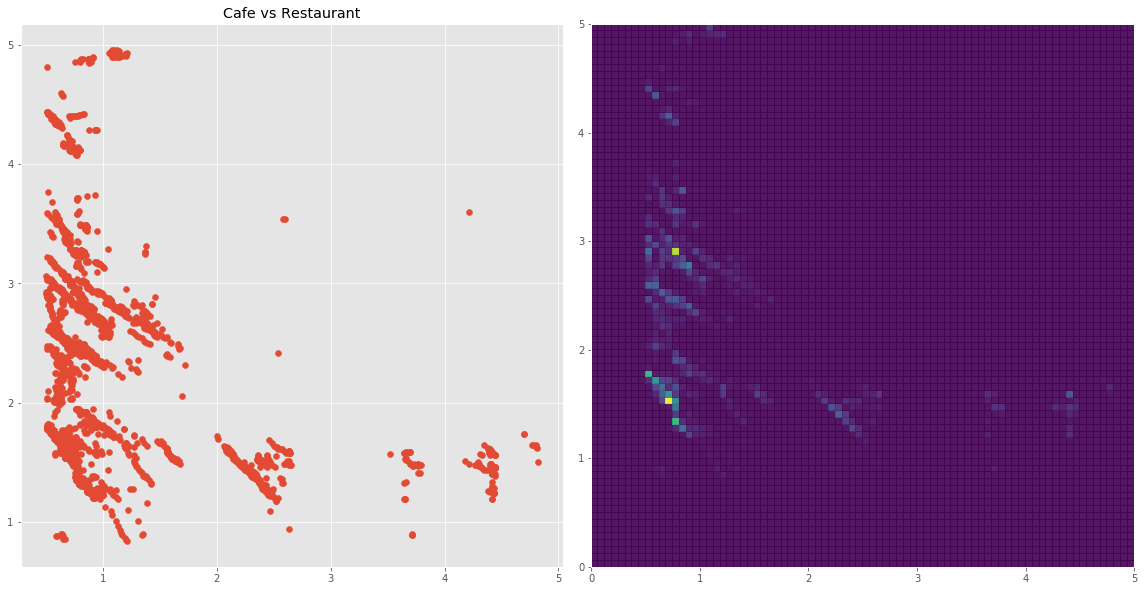

In [111]:
X,Y = find_and_remove_5_stars(cafeAvgCount_stripped[2], restaurantAvgCount_stripped[2])

fig = plt.figure(figsize=(16,16))
#ax = fig.add_subplot(111, projection='3d')
gs = gridspec.GridSpec(nrows=2, ncols=2)

ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(X, Y)
ax0.set_title('Cafe vs Restaurant')

ax1 = fig.add_subplot(gs[0,1])
ax1.hist2d(X, Y, 80, range=[[0, 5],[0, 5]], alpha=0.9)
#ax1.set_title()


plt.tight_layout()
plt.show()

In [0]:
def build_2dHistogram(dataset, n_bins, figSize):

  figSize = figSize
  
  n_bins = n_bins
  dataset = dataset
  number_of_values = n_bins
    
  if figSize == 0:
    fig = plt.figure(figsize=(4*(number_of_values),4*(number_of_values)))
  else:
    fig = plt.figure(figsize=(figSize,figSize))
  
  gs = gridspec.GridSpec(nrows=number_of_values, ncols=number_of_values)
  
  
  axTable = []
    
  for a in dataset:
    axTable.append(str(a[3]))
  
  
  labels = list(combinations(axTable, 2))
  
    
  values = list(combinations(dataset, 2))
  
  d = dict(zip(labels,values))

  xCoord = 0
  yCoord = 0

  for k,v in d.items():
    X, Y =  find_and_remove_5_stars(v[0][2], v[1][2])
    b = fig.add_subplot(gs[xCoord,yCoord])
    b.hist2d(X, Y, 75, range=[[0, 5],[0, 5]], alpha=0.9)
    a_Title = str(str.capitalize(k[0][4:])+' '+'vs.'+' '+str.capitalize(k[1][4:]))
    title = a_Title.replace('_', ' ')
    b.set_title(title)

    if xCoord < number_of_values**.5-1:
      xCoord += 1
    else:
      xCoord = 0
      yCoord += 1
  
  
  plt.tight_layout()
  plt.show()
  



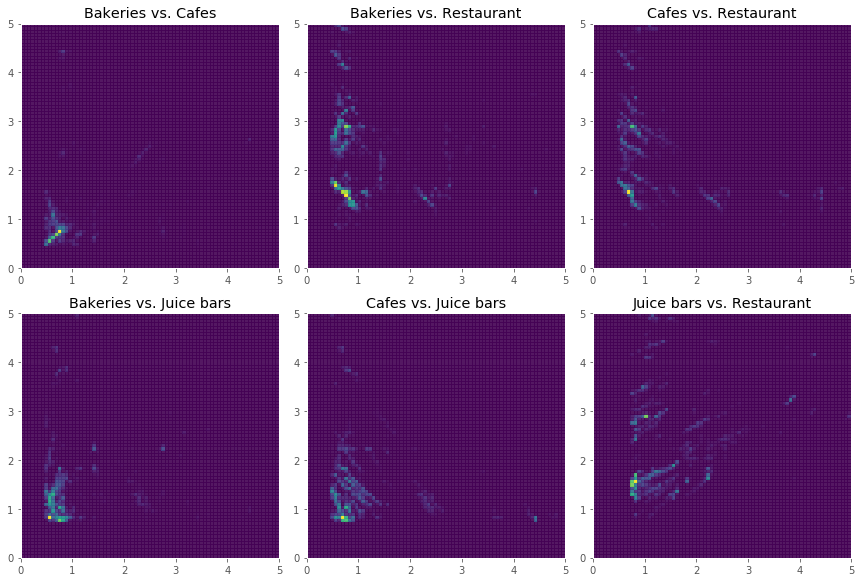

In [113]:
a = build_2dHistogram(eateries_stripped, len(eateries_stripped), 0)

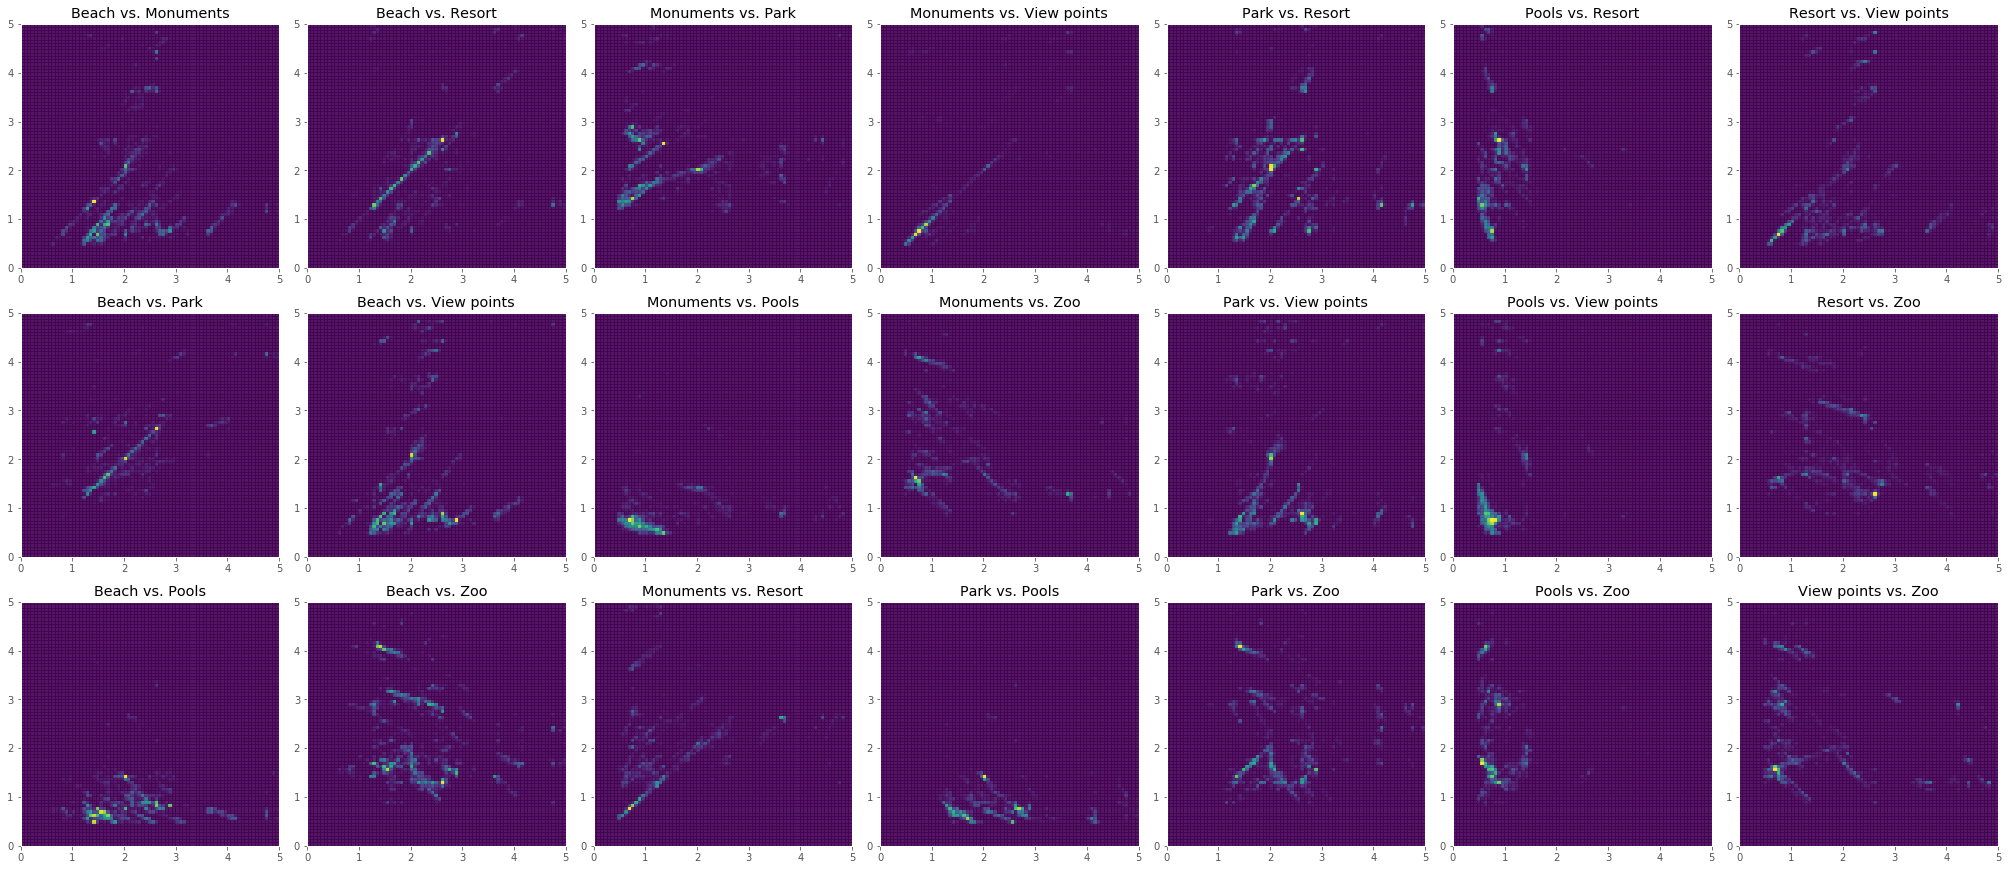

In [114]:
a = build_2dHistogram(outside_stripped, len(outside_stripped), 0)

## The 2D Histogram data shows a user's average rating for one category compared to their average rating for another category. Let's take a look at two interesting graphs. Monuments vs. Resort, and Park vs. Pools. 

## In the Monuments vs. Resort 2D Histogram, you can see very clear oblique lines. These lines represent the interesting consequence that users' average rating trends (i.e., a person who is likely to, on average, rate their Resorts a 1, is also likely to rate their Monuments a 1), and perhaps more interestingly, that the distribution of users also shows a very linear correspondence. This linear correspondence, I believe, implies that users are much more likely to rate certain establishments via an internal default tendency rating, rather than having that rating be representative of the actual establishment itself. 


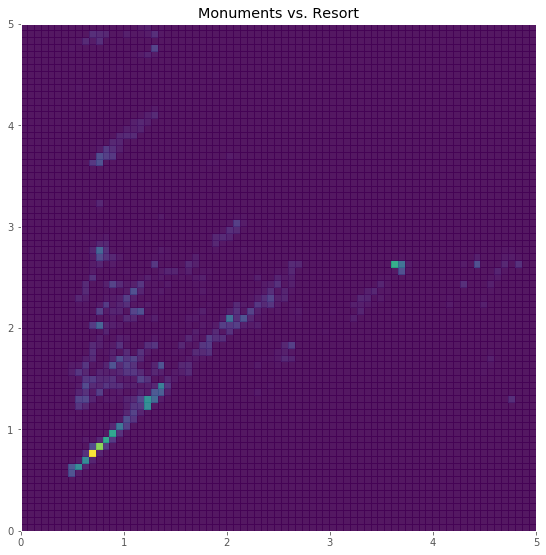

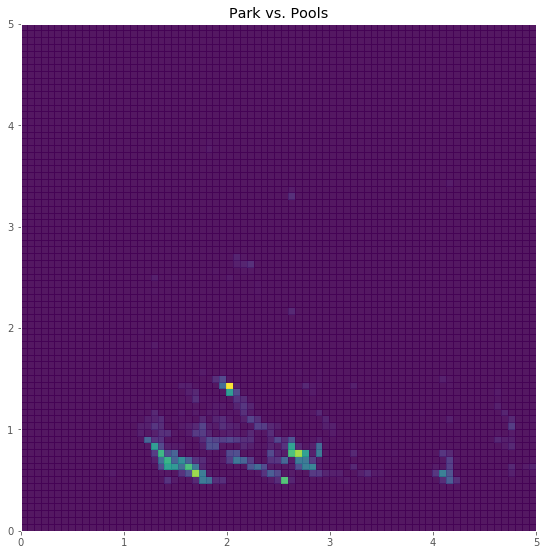

In [115]:
a = build_2dHistogram([monumentsAvgCount_stripped, resortAvgCount_stripped], 2, 15)
b = build_2dHistogram([parkAvgCount_stripped, poolAvgCount_stripped], 2, 15)


## This is not the case for all categories. The Monuments vs. Resort category appears to have a very strong unreliable tendency.  However, Park vs. Pools appears to show negative trend lines. This is interesting in the other direction, as it implies that users who are more likely to like Pools are less likely to like Parks.  Additionally, consider the absence of any averages under 1 for the Park category. This is interesting as the user-average, as established earlier, must consider missing ratings as zero ratings.  

## The fact that there is no clustering within the sub-1-star rating column for Park (but there is for Pools) leads to the interesting conclusion that IF a user has rated a park (i.e., has a greater than 0 average rating for Parks), THEN the user has rated LOTS of parks, thus ensuring that their average rating for all parks is greater than the minimum. 

## This can be extended to any of the columns/rows for which there is an absense of clustering below the 1.0 line. 

## Another take-away we can determine from these graphs is that there are very clear subsets of users within the overall dataset. This is evidenced by the multiple different lines of similar slope, but having different start and end points within the graph. Look, for example, at Beach vs. Park.  This graph is very clearly broken up into very distinct trend lines. This leads us to the conclusion that user averages are once again somewhat unreliable of a resource since the only way to have these trend lines is to have an underlying default tendency among various user subgroups who tend to rate establishments of a certain category in a certain way. 



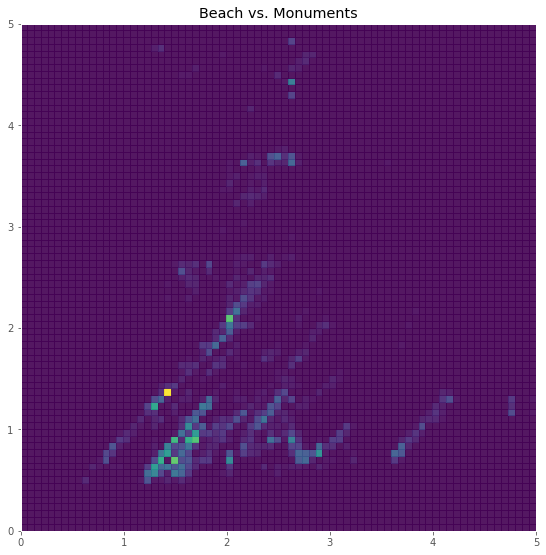

In [120]:
a = build_2dHistogram([beachAvgCount_stripped, monumentsAvgCount_stripped], 2, 15)

In [0]:
def build_1dHistogram(dataset, n_bins):
  n_bins = n_bins
  dataset = dataset
  number_of_values = n_bins
    
  fig = plt.figure(figsize=(4*(number_of_values),4*(number_of_values)))
  gs = gridspec.GridSpec(nrows=number_of_values, ncols=number_of_values)
  axTable = []
  
  for a in dataset:
    axTable.append(str(a[3]))
    
  d = dict(zip(axTable,dataset))
  
  xCoord = 0
  yCoord = 0

  for k,v in d.items():
    X = v[2]
    b = fig.add_subplot(gs[xCoord,yCoord])
    b.hist(X, bins=n_bins)
    a_Title = str.capitalize(str(k)[4:])+' '+str(len(X))+' Total Votes'
    title = a_Title.replace('_', ' ')
    
    b.set_title(title)
    b.yaxis.set_major_formatter(PercentFormatter(xmax=len(X)))
    if xCoord < number_of_values**.5-1:
      xCoord += 1
    else:
      xCoord = 0
      yCoord += 1
      
  plt.tight_layout()
  plt.show()


# Showing the distribution of averages within each category, without the 5-star votes:

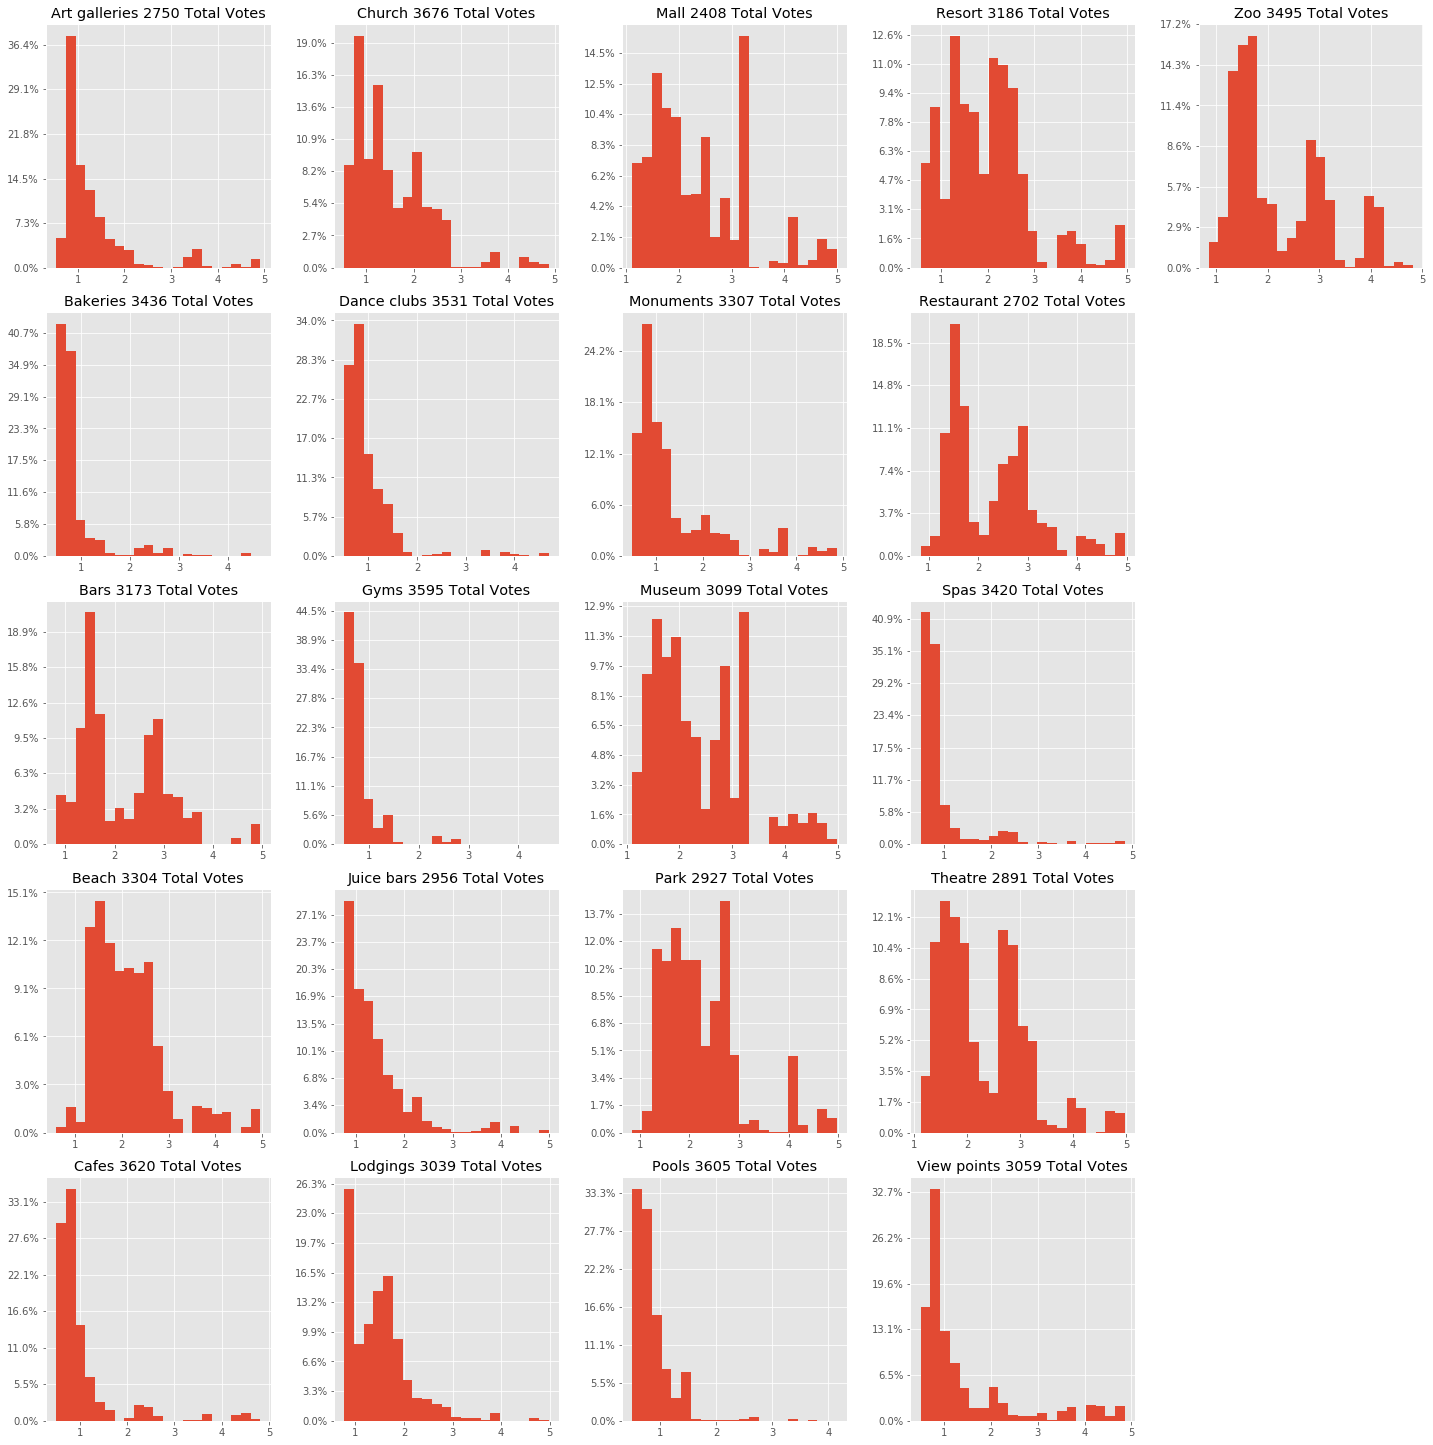

In [121]:
a = build_1dHistogram(total_Averages_no_5_stripped, len(total_Averages_no_5_stripped))

# And when we toss back in the 5-star ratings:

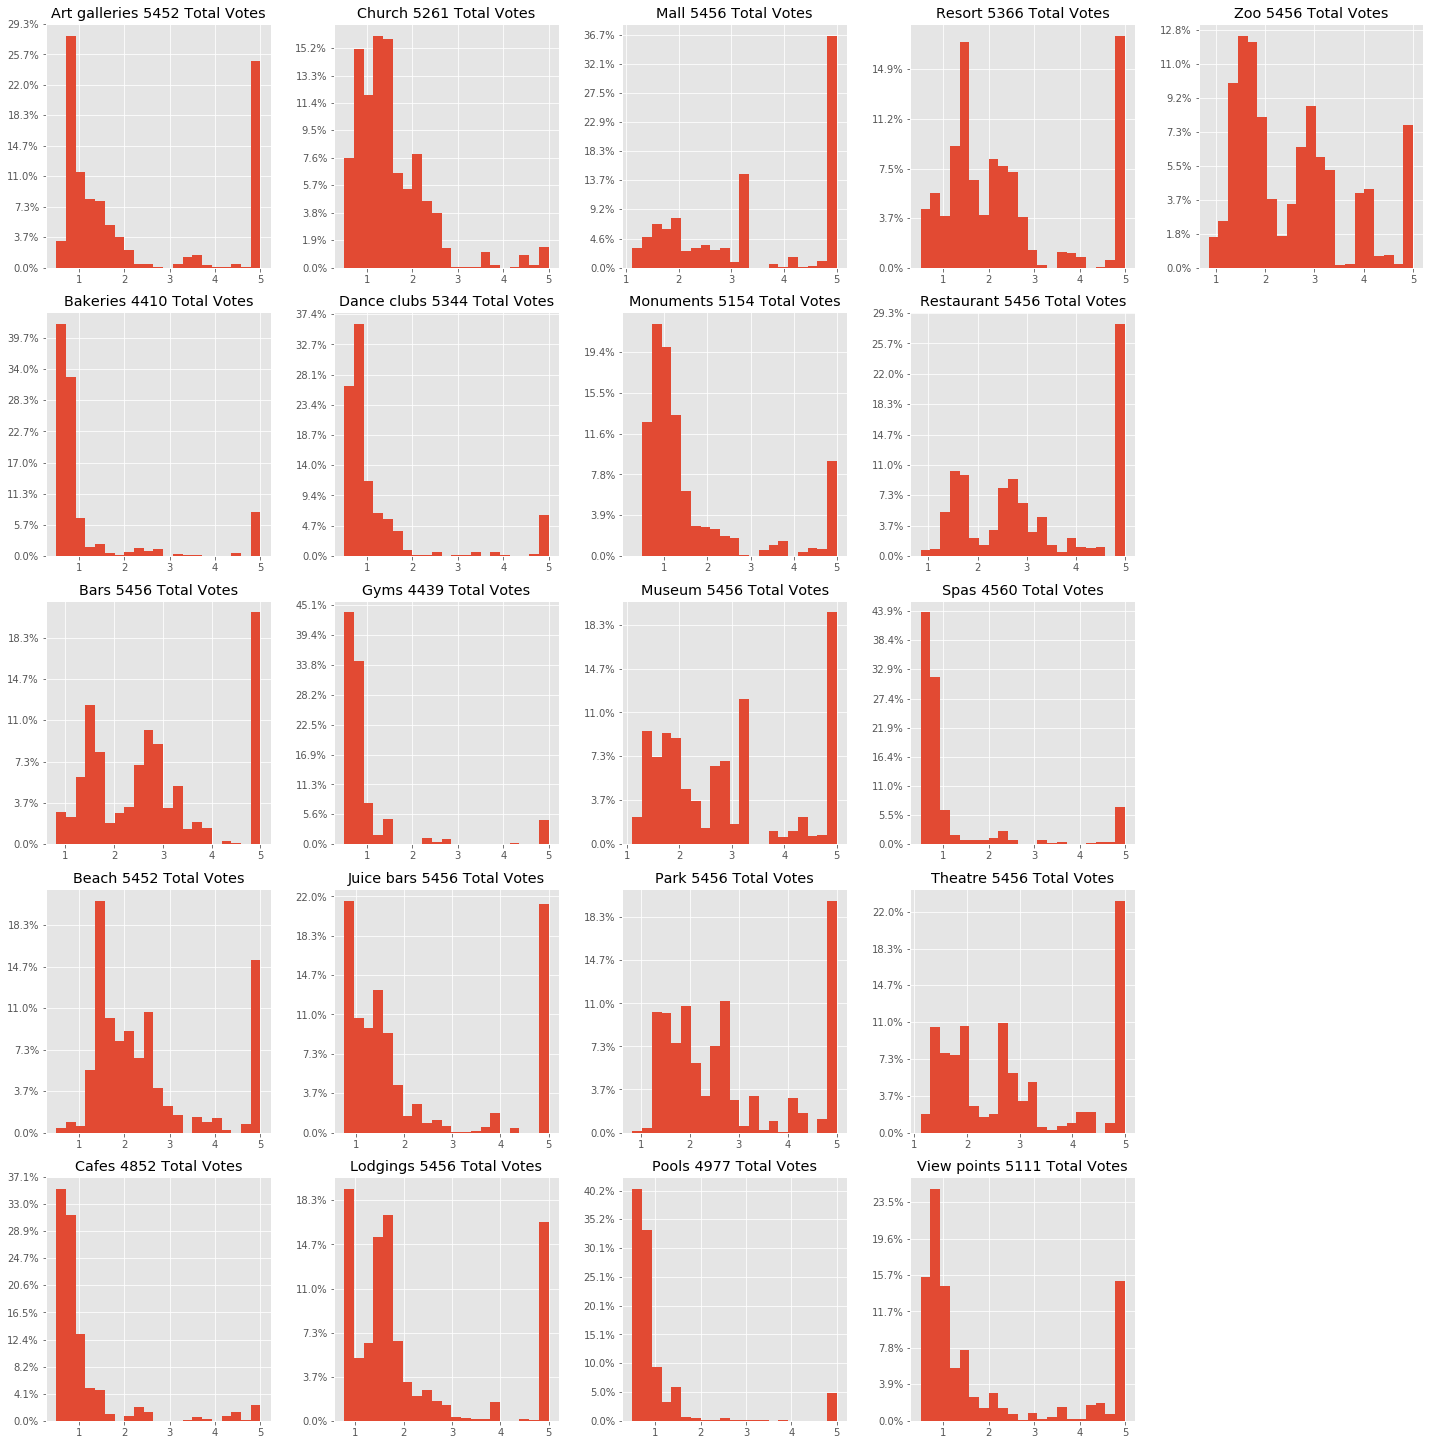

In [119]:
a = build_1dHistogram(total_Averages, len(total_Averages))

## Finally, we see by the very clear inclusion of multiple, separate high-distribution buckets, that users tend to bucketize themselves into categories of rating averages.  There are a few minor conclusions we can make about the tendency for establishments to be well reviewed (or pooly reviewed) but the 1-5 star rating is, perhaps, an inherently flawed and unreliable way to, by way of averages, assess the appeal of any particular establishment class. 

## Additionally, without further detailed data (say for example, a collection of ratings of an establishment, and the per-establishment comparison data) to say some of the broad-view assessments one might otherwise be able to make when taking an aggregated average on a by-user basis of all-reviewed establishments within an arbitrary subclass. 

## We also don't know the methodology behind the establishment of the sublcasses, nor if there is overlap or duplicate data. (i.e., a pizza & burger joint is perhaps sampled within the averages of both the pizza, and the burger joint, subclasses, thus reducing the strength of any pizza-to-burger comparison.)